# week5.1

Regression assumptions

Linear regression makes several assumptions about the data, such as :

Linearity of the data. The relationship between the predictor (x) and
the outcome (y) is assumed to be linear. Normality of residuals. The
residual errors are assumed to be normally distributed. Homogeneity of
residuals variance. The residuals are assumed to have a constant
variance (homoscedasticity) Independence of residuals error terms. You
should check whether or not these assumptions hold true. Potential
problems include:

Non-linearity of the outcome - predictor relationships
Heteroscedasticity: Non-constant variance of error terms. Presence of
influential values in the data that can be: Outliers: extreme values in
the outcome (y) variable High-leverage points: extreme values in the
predictors (x) variable All these assumptions and potential problems can
be checked by producing some diagnostic plots visualizing the residual
errors.

In [6]:
library(tidyverse)
library(broom)
library(datarium)


In [7]:
data("marketing", package="datarium")

In [13]:
dim(marketing)

[1] 200   4

In [9]:
mod1 <- lm(sales ~ youtube, data = marketing)

# residuale vs fitte -> linear relationship
looks good

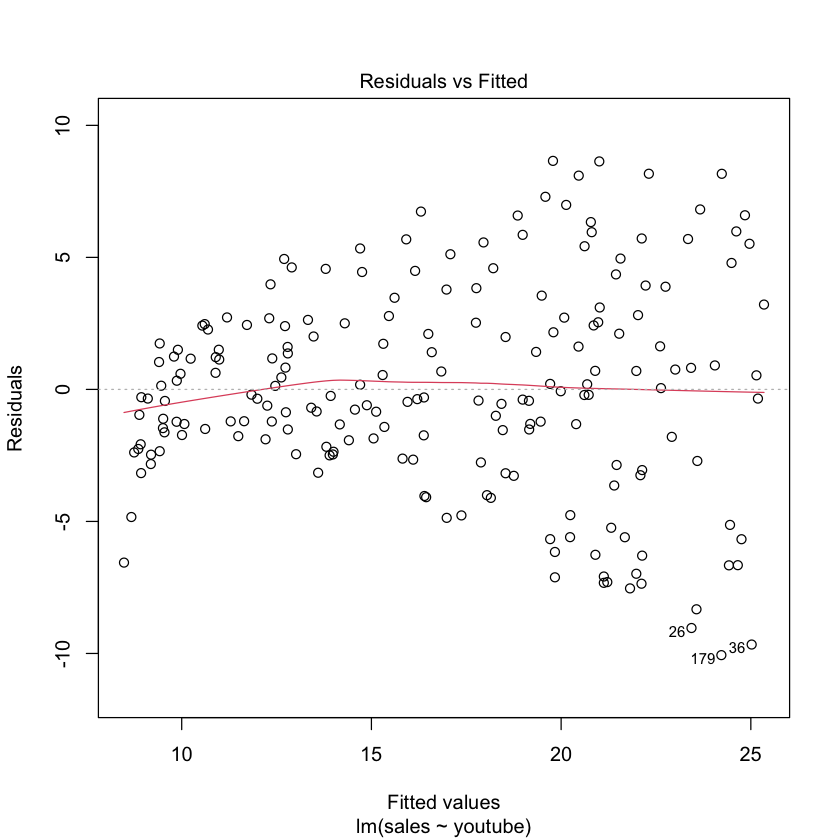

In [11]:
plot(mod1, 1)

# The normal qq plot
There are some issues since it is not stricly on the line. Looks ok.

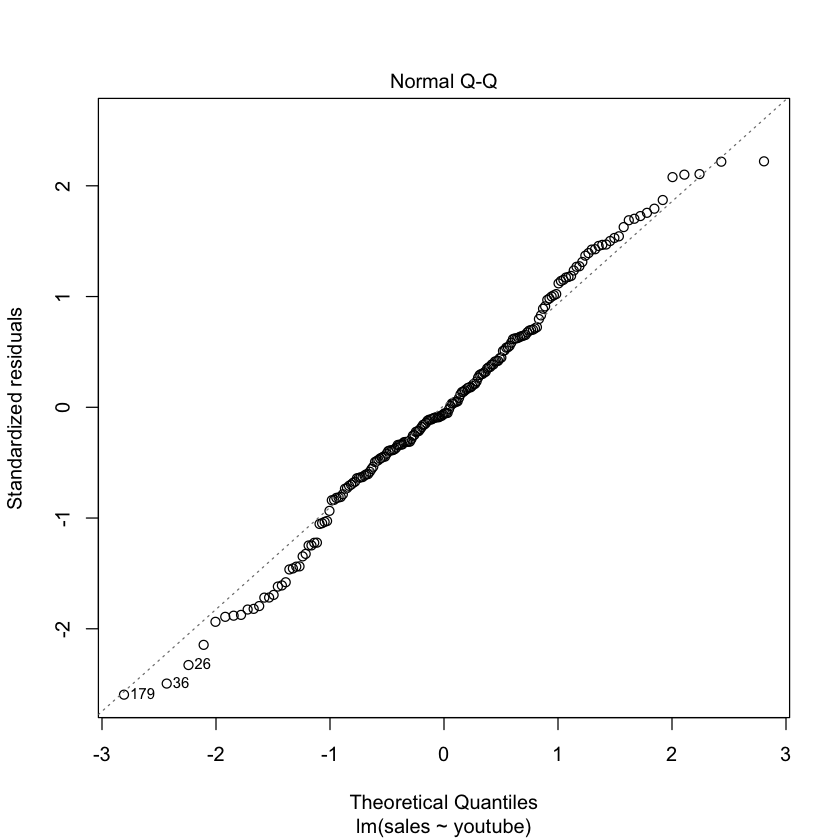

In [12]:
plot(mod1, 2)

# 3 gives scale location plot -> variance 

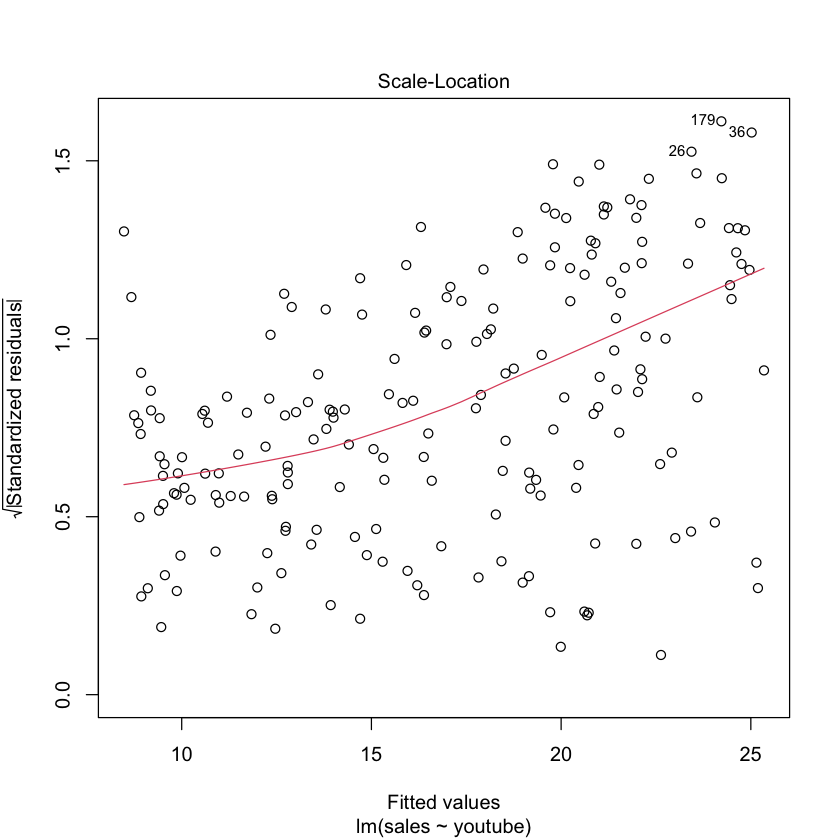

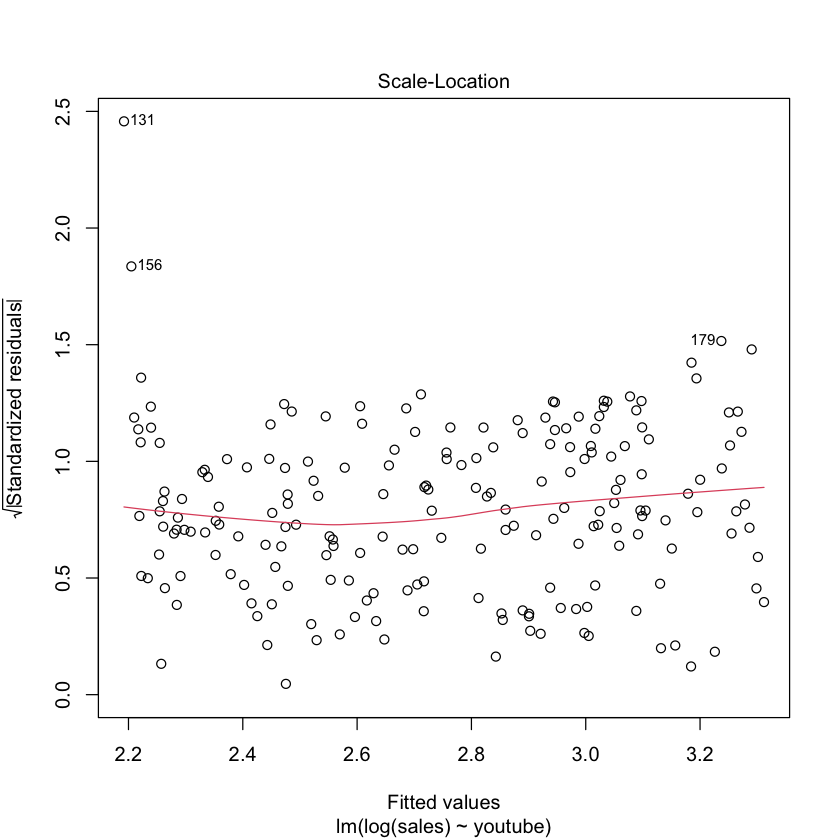

In [15]:
plot(mod1, 3)

mod2 <- lm(log(sales) ~ youtube, data = marketing)
plot(mod2, 3)

In [17]:
summary(mod1)
summary(mod2)


Call:
lm(formula = sales ~ youtube, data = marketing)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0632  -2.3454  -0.2295   2.4805   8.6548 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.439112   0.549412   15.36   <2e-16 ***
youtube     0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.91 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16



Call:
lm(formula = log(sales) ~ youtube, data = marketing)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.53984 -0.13125  0.03008  0.16696  0.42554 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.1895138  0.0361853   60.51   <2e-16 ***
youtube     0.0031555  0.0001772   17.81   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2575 on 198 degrees of freedom
Multiple R-squared:  0.6156,	Adjusted R-squared:  0.6137 
F-statistic: 317.1 on 1 and 198 DF,  p-value: < 2.2e-16


# check the outlier -> no concern here

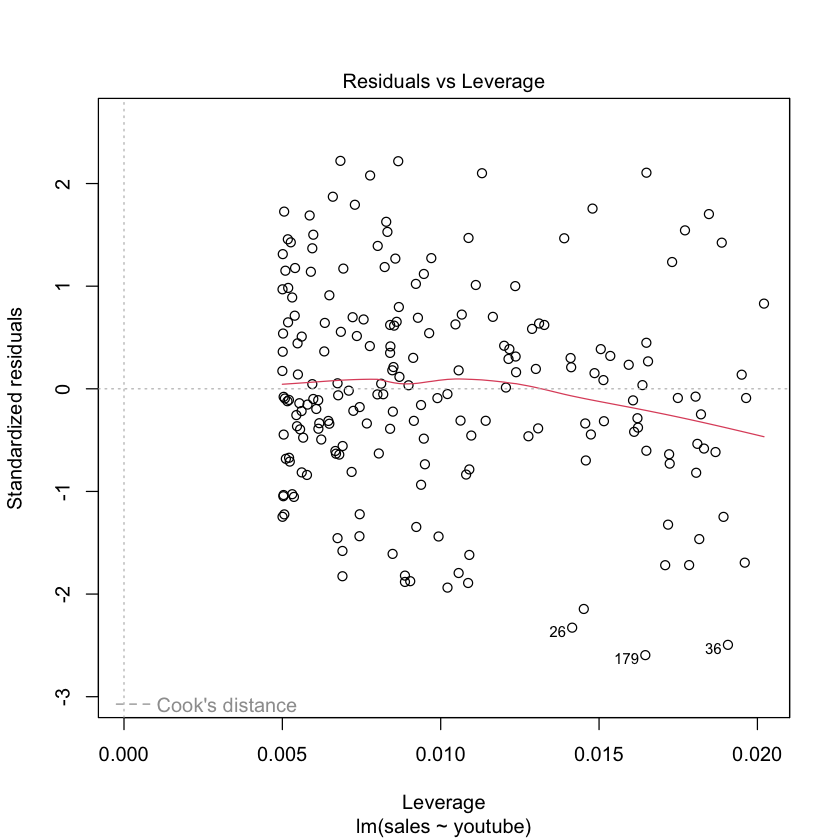

In [19]:
plot(mod1, 5)

Forward stepwise selection is a variable selection method commonly used in the context of multiple linear regression. The goal of this technique is to systematically build a predictive model by iteratively adding the most significant predictor variables to the model.

Here's a step-by-step explanation of the forward stepwise selection process:

1. **Start with an Empty Model:**
   - Begin with an empty model that contains no predictor variables.

2. **Evaluate All Single Predictor Models:**
   - Fit simple linear regression models for each predictor variable in isolation.
   - Choose the variable that provides the best improvement in the model, typically based on a criterion like the p-value or another measure of statistical significance.

3. **Add the Best Predictor to the Model:**
   - Add the selected variable to the model.

4. **Iterative Process:**
   - Repeat the process iteratively.
   - At each step, evaluate the remaining variables not yet included in the model.
   - Add the variable that contributes the most to the model's improvement, again based on some criterion.

5. **Stopping Criteria:**
   - Stop the process when a predefined stopping criterion is met. Common stopping criteria include reaching a specified number of variables or when no remaining variables meet the significance threshold for inclusion.

6. **Model Assessment:**
   - Assess the final model for its goodness of fit and predictive performance using appropriate metrics (e.g., R-squared, adjusted R-squared, cross-validation).

QQ plot and Skewness

In [5]:

# Generate left-skewed data
data <- rgamma(100, shape = 2, scale = 1)
ggplot(aes(x=data)) + geom_density() 

# Create QQ plot
qqnorm(data)
qqline(data, distribution = "gamma", shape = 2, scale = 1)


ERROR: [1m[33mError[39m in `fortify()`:[22m
[1m[22m[33m![39m `data` must be a [34m<data.frame>[39m, or an object coercible by `fortify()`,
  not a <uneval> object.
[36mi[39m Did you accidentally pass `aes()` to the `data` argument?


Backward stepwise regression is another variable selection method used in the context of multiple linear regression. It is the reverse process of forward stepwise selection, starting with a model that includes all predictor variables and then iteratively removing the least significant variables.

Here's a step-by-step explanation of the backward stepwise regression process:

1. **Start with a Full Model:**
   - Begin with a model that includes all predictor variables.

2. **Evaluate All Variables in the Model:**
   - Fit the multiple linear regression model using all variables.
   - Evaluate the significance of each variable in the model, typically based on a criterion like p-values.

3. **Remove the Least Significant Variable:**
   - Identify the least significant variable (highest p-value).
   - Remove this variable from the model.

4. **Iterative Process:**
   - Repeat the process iteratively.
   - After removing one variable, re-evaluate the remaining variables in the model.
   - Continue removing the least significant variable at each step.

5. **Stopping Criteria:**
   - Stop the process when a predefined stopping criterion is met. This could be reaching a specified number of variables or when all remaining variables in the model have p-values below a certain threshold.

6. **Model Assessment:**
   - Assess the final model for its goodness of fit and predictive performance using appropriate metrics (e.g., R-squared, adjusted R-squared, cross-validation).

Similar to forward stepwise selection, backward stepwise regression has its advantages and considerations:

- **Simplicity:** Backward stepwise regression provides a simple and systematic approach to variable selection, particularly when dealing with a large number of potential predictors.

- **Avoiding Multicollinearity:** By iteratively removing the least significant variables, backward stepwise regression can help address multicollinearity issues and reduce model complexity.

- **Potential Omitted Variable Bias:** Similar to forward selection, backward selection might lead to omitted variable bias if important variables are not initially included in the model.

- **P-value Threshold:** The choice of the significance threshold for variable removal can impact the final model, and different thresholds may lead to different models.

Choosing between forward and backward stepwise regression often depends on the specific context, the goals of the analysis, and the trade-off between model simplicity and performance. Researchers may also consider more advanced techniques or explore subsets of variables based on domain knowledge and statistical criteria.